Trabajaremos con la base ya procesada, y abrimos la otra de referencia:

In [4]:
import pandas as pd
import numpy as np
path="C:/Users/HUGO/Desktop/Maestria en CIENCIA DE DATOS UANL/Aprendizaje automatico/"
pd.set_option("display.max_columns",None)

In [5]:
loans=pd.read_csv(path+"loansmodified3.csv")
loans_dummies=pd.read_csv(path+"loans_dummies.csv")
loans_dummies #ya escalada

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail
0,0.082601,0.002500,0.002963,0.0,0.006996,0.010003,0.005912,0.910632,0,1,1,0,0,0,0,1,0,0,0,0,0
1,0.105448,0.000250,0.011089,0.0,0.000000,0.035010,0.020692,0.278505,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.147627,0.000875,0.001529,0.0,0.000000,0.005590,0.003304,0.254622,1,0,0,0,0,0,0,0,0,0,1,0,0
3,0.084359,0.000125,0.001052,0.0,0.000000,0.004119,0.002434,0.241525,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.147627,0.006876,0.009368,0.0,0.000000,0.029715,0.017562,0.248844,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313089,0.024605,0.003125,0.001052,0.0,0.003736,0.004119,0.004260,0.232280,0,0,0,0,0,1,1,0,1,0,0,0,0
313090,0.442882,0.000625,0.081073,0.0,0.000000,0.250397,0.222074,0.232280,1,1,0,0,0,0,1,0,0,0,1,0,0
313091,0.147627,0.000125,0.001052,0.0,0.000000,0.004119,0.004260,0.232280,0,0,0,0,0,0,1,0,0,0,1,0,0
313092,0.147627,0.000625,0.000096,0.0,0.000000,0.001177,0.001304,0.232280,0,0,0,0,0,1,1,0,0,0,1,0,0


In [19]:
# Primero importamos un montón de modelos 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [30]:
#dealing oversampling
loans_dummies["paid"]=loans["paid"]
loans_balancedp=loans_dummies[loans_dummies["paid"]==0]
loans_s=loans_dummies[loans_dummies["paid"]==1].sample(len(loans_balancedp))
loans_balanced=pd.concat([loans_balancedp,loans_s])
loans_balanced.reset_index(inplace=True)
loans_balanced.drop("index",axis=1,inplace=True)
loans_balanced

,Term,NoEmp,DisbursementGross,BalanceGross,ChgOffPrinGr,GrAppv,SBA_Appv,timediff,NewExist_2.0,UrbanRural_2.0,RevLineCr_1.0,same_state_1.0,LowDoc_1,CreateJob_1,RetainedJob_1,NAICS_cat2_Construction,NAICS_cat2_Health care and social assistance,NAICS_cat2_Manufacturing,NAICS_cat2_Other,"NAICS_cat2_Professional, scientific, and technical services",NAICS_cat2_Retail,paid
0,0.082601,0.002500,0.002963,0.0,0.006996,0.010003,0.005912,0.910632,0,1,1,0,0,0,0,1,0,0,0,0,0,0.0
1,0.056239,0.000375,0.004397,0.0,0.025492,0.014416,0.008520,0.241911,1,0,1,0,0,0,0,0,1,0,0,0,0,0.0
2,0.028120,0.000750,0.001529,0.0,0.002637,0.005590,0.003304,0.264638,0,0,1,1,0,0,0,0,0,0,0,0,1,0.0
3,0.007030,0.001000,0.009100,0.0,0.050573,0.029126,0.017214,0.243837,0,0,1,1,0,0,0,0,0,0,0,1,0,0.0
4,0.021090,0.000125,0.004564,0.0,0.024594,0.029126,0.017214,0.246918,0,0,1,1,0,0,0,0,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111879,0.421793,0.000750,0.016442,0.0,0.000000,0.051486,0.061033,0.338983,0,0,0,1,0,0,1,0,0,0,1,0,0,1.0
111880,0.042179,0.001625,0.002963,0.0,0.000000,0.010003,0.005912,0.246918,0,0,0,0,0,0,1,0,0,0,1,0,0,1.0
111881,0.195079,0.000625,0.013118,0.0,0.000000,0.021771,0.012867,0.253082,0,0,0,0,0,0,1,0,0,0,0,1,0,1.0
111882,0.105448,0.000125,0.003059,0.0,0.000000,0.010297,0.006086,0.235747,1,1,0,1,0,0,1,0,0,0,1,0,0,1.0


In [31]:
X = loans_balanced.drop("paid",axis=1)
Y = loans_balanced[['paid']]

In [32]:
X_test, X_train, y_test, y_train = train_test_split(X, Y, test_size=0.80,random_state=12) # 75% training and 25% test


In [34]:
y_train['paid'].value_counts() #more balanced

0.0    44772
1.0    44736
Name: paid, dtype: int64

In [35]:
#RandomForestClassifier
loan_RFC=RandomForestClassifier(n_estimators=100,random_state=12)
loan_RFC.fit(X_train,y_train)

C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(random_state=12)

In [36]:
#Predict the response for test dataset
y_pred = loan_RFC.predict(X_test)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

#accuracy of the model:
cmrf=confusion_matrix(y_test, y_pred)
                       
def acc(cm):
    
    acc=(cm[0][0]+cm[1][1])/cm.sum()
    return(acc) 

acc(cmrf)  #96.26%

0.9957543796925277

In [40]:
#Hacemos cross validation para asegurarnos de que el accuracy es alto
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=5, shuffle=True, random_state=12)

# Perform cross-validation
scores = cross_val_score(loan_RFC, X, Y, cv=kf, scoring='accuracy')

# Compute the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# Print the mean and standard deviation of the scores
print('Mean accuracy:', mean_score)
print('Standard deviation:', std_score)

C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:

Mean accuracy: 0.9958796599578111
Standard deviation: 0.00032152535917605166


In [41]:
#De otra manera
scores = cross_val_score(loan_RFC, X, Y, cv=10)
scores
#array([0.94879518, 0.95858434, 0.96385542, 0.99472892, 0.99397136,
#       0.99397136, 0.99472494, 0.99698568, 0.71891485, 0.50791258])

C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:680: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HUGO\anaconda\envs\project2\lib\site-packages\sklearn\model_selection\_validation.py:

array([0.99544195, 0.99553133, 0.99633569, 0.99678255, 0.99535216,
       0.99606721, 0.99588845, 0.99526278, 0.99606721, 0.99597783])

In [44]:
print("%0.4f mean accuracy with a standard deviation of %0.4f" % (scores.mean(), scores.std()))


0.9959 mean accuracy with a standard deviation of 0.0005


In [43]:
#feature importance:
importances=loan_RFC.feature_importances_

# summarize feature importance
for i,v in zip(X_train.columns,enumerate(importances)):
    print('Feature: {}, Score: {}'.format(i,v))

Feature: Term, Score: (0, 0.15576559059768819)
Feature: NoEmp, Score: (1, 0.0038252760913351272)
Feature: DisbursementGross, Score: (2, 0.008857786873230019)
Feature: BalanceGross, Score: (3, 0.0)
Feature: ChgOffPrinGr, Score: (4, 0.778505659468493)
Feature: GrAppv, Score: (5, 0.0077302172894880734)
Feature: SBA_Appv, Score: (6, 0.011873034244895015)
Feature: timediff, Score: (7, 0.009387295145254571)
Feature: NewExist_2.0, Score: (8, 0.0015318955951600826)
Feature: UrbanRural_2.0, Score: (9, 0.0006367076701616002)
Feature: RevLineCr_1.0, Score: (10, 0.0027384017962509637)
Feature: same_state_1.0, Score: (11, 0.013183234400604787)
Feature: LowDoc_1, Score: (12, 0.0005484827560490613)
Feature: CreateJob_1, Score: (13, 0.001176703960026416)
Feature: RetainedJob_1, Score: (14, 0.0009852076933580885)
Feature: NAICS_cat2_Construction, Score: (15, 0.00036313769380770804)
Feature: NAICS_cat2_Health care and social assistance, Score: (16, 0.0006899067249638836)
Feature: NAICS_cat2_Manufacturin

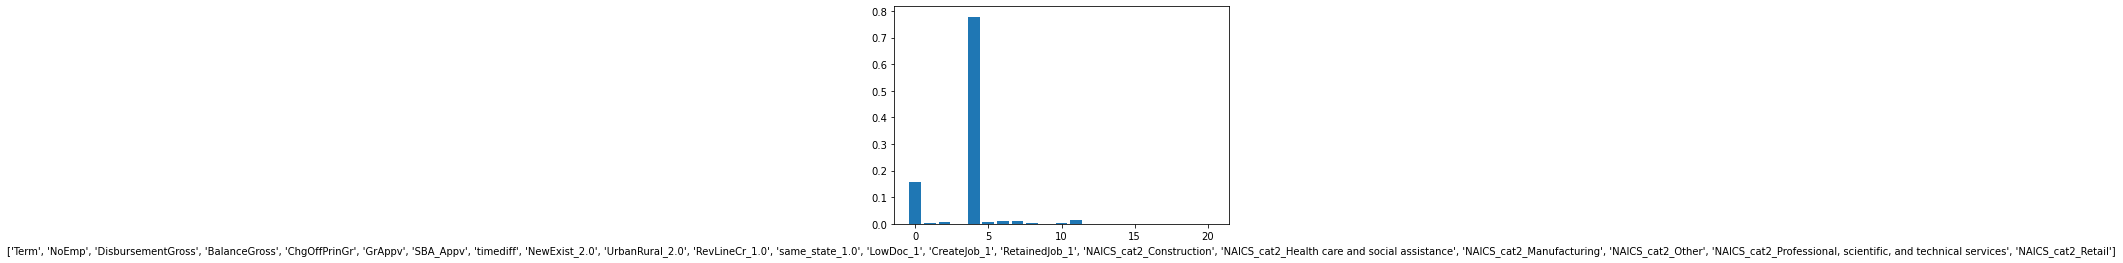

In [48]:
# plot feature importance
import matplotlib.pyplot as plt

plt.bar([x for x in range(len(importances))], importances)
plt.xlabel([x for x in X_train.columns])
plt.show()